In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [3]:
#Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую)
data = pd.read_csv('athletes.csv', delimiter=',')
data

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
11533,265605954,Zurian Hechavarria,CUB,female,8/10/95,1.64,58.0,athletics,0,0,0
11534,214461847,Zuzana Hejnova,CZE,female,12/19/86,1.73,63.0,athletics,0,0,0
11535,88361042,di Xiao,CHN,male,5/14/91,1.85,100.0,wrestling,0,0,0
11536,900065925,le Quoc Toan Tran,VIE,male,4/5/89,1.60,56.0,weightlifting,0,0,0


1. age: непрерывный.
2. workclass: Частный, Самостоятельный, не включаемый, Самостоятельный, Федеральный, Местный, Государственный, Без оплаты, Никогда не работал.
3. fnlwgt: примерная оценка количества людей, которое представляет каждая строка данных ????.
4. education: бакалавриат, колледж, 11-й, высшая школа, проф-школа, доцент, доцент, 9, 7-8, 12, магистр, 1-4, 10, докторская степень, 5-6, дошкольное.
5. номер образования: непрерывное.
6. marital-status: Женат-гражданский супруг, Разведен, Никогда не был женат, Раздельно живёт, Вдова, Женат-супруга-отсутствует, Женат-AF-супруга.
7. occupation, род занятий: Техподдержка, Ремесленно-ремонтный, Прочие услуги, Продажи, Руководитель-менеджер, Профессор-специальности, Обработчики-уборщики, Машино-осмотр, Администратор-Канцелярский, Сельскохозяйственно-рыболовный, Транспортно-переездной, Частный дом- служба, Защитная служба, Вооруженные Силы.
8. relationship, Отношения: Жена, Собственный ребенок, Муж, Несемейный, Другой родственник, Незамужний.
9. раса: Белый, Азиатско-Тихоокеанский островитянин, Американец-Индеец-Эскимос, Другой, Черный.
10. пол: Женский, Мужской.
11. capital-gain, прирост капитала: непрерывный.
12. capital-loss, потери капитала: постоянные.
13. часов в неделю: непрерывно.
14. Родная страна: США, Камбоджа, Англия, Пуэрто-Рико, Канада, Германия, отдаленные США (Гуам-USVI-и т. д.), Индия, Япония, Греция, Юг, Китай, Куба, Иран, Гондурас, Филиппины, Италия. , Польша, Ямайка, Вьетнам, Мексика, Португалия, Ирландия, Франция, Доминиканская Республика, Лаос, Эквадор, Тайвань, Гаити, Колумбия, Венгрия, Гватемала, Никарагуа, Шотландия, Таиланд, Югославия, Сальвадор, Тринадад и Тобаго, Перу, Гонконг , Голландия-Нидерланды.
15. вывод: >50 тыс., <= 50 тыс.

##### Непрерывные

In [3]:
#Проведите первичный анализ.
data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [4]:
#Проверьте данные на пропуски. Удалите в случае обнаружения. 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


Явно нулевых данных в датафрейме нет, но они заменены '?'. Посмотрим категориальные данные.

#### Категориальные
###### рабочий класс

In [5]:
mode = data['workclass'].mode()[0]
count = data['workclass'].value_counts()
unique = data['workclass'].unique()
print('мода:', mode, '\n', '\n', count, '\n', '\n', 'уникальные значения:', unique)

мода: Private 
 
 workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64 
 
 уникальные значения: ['Private' 'Local-gov' '?' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']


In [6]:
#сразу удалим строки со знаками вопроса
data = data.loc[data['workclass'] != '?']
data['workclass'].value_counts()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

###### уровень образования

In [7]:
mode = data['education'].mode()[0]
count = data['education'].value_counts()
unique = data['education'].unique()
print('мода:', mode, '\n', '\n', count, '\n', '\n', 'уникальные значения:', unique)

мода: HS-grad 
 
 education
HS-grad         14974
Some-college    10038
Bachelors        7772
Masters          2590
Assoc-voc        1978
11th             1634
Assoc-acdm       1529
10th             1241
7th-8th           845
Prof-school       810
9th               687
12th              599
Doctorate         576
5th-6th           468
1st-4th           229
Preschool          73
Name: count, dtype: int64 
 
 уникальные значения: ['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool']


###### marital-status

In [8]:
mode = data['marital-status'].mode()[0]
count = data['marital-status'].value_counts()
unique = data['marital-status'].unique()
print('мода:', mode, '\n', '\n', count, '\n', '\n', 'уникальные значения:', unique)

мода: Married-civ-spouse 
 
 marital-status
Married-civ-spouse       21452
Never-married            14882
Divorced                  6364
Separated                 1433
Widowed                   1296
Married-spouse-absent      584
Married-AF-spouse           32
Name: count, dtype: int64 
 
 уникальные значения: ['Never-married' 'Married-civ-spouse' 'Widowed' 'Separated' 'Divorced'
 'Married-spouse-absent' 'Married-AF-spouse']


###### occupation

In [9]:
mode = data['occupation'].mode()[0]
count = data['occupation'].value_counts()
unique = data['occupation'].unique()
print('мода:', mode, '\n', '\n', count, '\n', '\n', 'уникальные значения:', unique)

мода: Prof-specialty 
 
 occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
?                      10
Name: count, dtype: int64 
 
 уникальные значения: ['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' 'Other-service'
 'Prof-specialty' 'Craft-repair' 'Adm-clerical' 'Exec-managerial'
 'Tech-support' 'Sales' 'Priv-house-serv' 'Transport-moving'
 'Handlers-cleaners' 'Armed-Forces' '?']


In [10]:
#сразу удалим строки со знаками вопроса
data = data.loc[data['occupation'] != '?']
data['occupation'].value_counts()

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

###### relationship

In [11]:
mode = data['relationship'].mode()[0]
count = data['relationship'].value_counts()
unique = data['relationship'].unique()
print('мода:', mode, '\n', '\n', count, '\n', '\n', 'уникальные значения:', unique)

мода: Husband 
 
 relationship
Husband           19005
Not-in-family     11916
Own-child          6706
Unmarried          4867
Wife               2139
Other-relative     1400
Name: count, dtype: int64 
 
 уникальные значения: ['Own-child' 'Husband' 'Not-in-family' 'Unmarried' 'Wife' 'Other-relative']


###### race

In [12]:
mode = data['race'].mode()[0]
count = data['race'].value_counts()
unique = data['race'].unique()
print('мода:', mode, '\n', '\n', count, '\n', '\n', 'уникальные значения:', unique)

мода: White 
 
 race
White                 39444
Black                  4356
Asian-Pac-Islander     1423
Amer-Indian-Eskimo      435
Other                   375
Name: count, dtype: int64 
 
 уникальные значения: ['Black' 'White' 'Asian-Pac-Islander' 'Other' 'Amer-Indian-Eskimo']


###### gender

In [13]:
mode = data['gender'].mode()[0]
count = data['gender'].value_counts()
unique = data['gender'].unique()
print('мода:', mode, '\n', '\n', count, '\n', '\n', 'уникальные значения:', unique)

мода: Male 
 
 gender
Male      31114
Female    14919
Name: count, dtype: int64 
 
 уникальные значения: ['Male' 'Female']


###### native-country

In [14]:
mode = data['native-country'].mode()[0]
count = data['native-country'].value_counts()
unique = data['native-country'].unique()
print('мода:', mode, '\n', '\n', count, '\n', '\n', 'уникальные значения:', unique)

мода: United-States 
 
 native-country
United-States                 41292
Mexico                          903
?                               811
Philippines                     283
Germany                         193
Puerto-Rico                     175
Canada                          163
El-Salvador                     147
India                           147
Cuba                            133
England                         119
China                           113
Jamaica                         103
South                           101
Italy                           100
Dominican-Republic               97
Japan                            89
Guatemala                        86
Vietnam                          83
Columbia                         82
Poland                           81
Haiti                            69
Portugal                         62
Iran                             56
Taiwan                           55
Greece                           49
Nicaragua                

In [15]:
data = data.loc[data['native-country'] != '?']
data['native-country'].value_counts()

native-country
United-States                 41292
Mexico                          903
Philippines                     283
Germany                         193
Puerto-Rico                     175
Canada                          163
El-Salvador                     147
India                           147
Cuba                            133
England                         119
China                           113
Jamaica                         103
South                           101
Italy                           100
Dominican-Republic               97
Japan                            89
Guatemala                        86
Vietnam                          83
Columbia                         82
Poland                           81
Haiti                            69
Portugal                         62
Iran                             56
Taiwan                           55
Greece                           49
Nicaragua                        48
Peru                             45
Ecuador      

###### income

In [16]:
mode = data['income'].mode()[0]
count = data['income'].value_counts()
unique = data['income'].unique()
print('мода:', mode, '\n', '\n', count, '\n', '\n', 'уникальные значения:', unique)

мода: <=50K 
 
 income
<=50K    34014
>50K     11208
Name: count, dtype: int64 
 
 уникальные значения: ['<=50K' '>50K']


In [17]:
#финально проверю всё на пропуски
data.loc[(data['age'] == '?') | 
         (data['workclass'] == '?') |
         (data['fnlwgt'] == '?')|
         (data['education'] == '?')|
         (data['marital-status'] == '?')|
         (data['occupation'] == '?')|
         (data['relationship'] == '?')|
         (data['race'] == '?')|
         (data['gender'] == '?')|
         (data['capital-gain'] == '?')|
         (data['capital-loss'] == '?')|
         (data['hours-per-week'] == '?')|
         (data['native-country'] == '?')|
         (data['income'] == '?')
         ]

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income


*Предложите альтернативный способ работы с пропусками

В зависимости от типа данных в столбце, их можно заменять модой, медианой или (редко) средним значением. Ещё можно получать эти значения не по всему датафрейму, а по ряду признаков, например, смотреть медиану только среди такой же возрастной категории, или по той же стране.

In [18]:
#Постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной 
#(из графика можно сделать вывод об особенностях датасета/класса/признака)

[Text(0, 0, '47.9261'),
 Text(0, 0, '47.2904'),
 Text(0, 0, '43.9749'),
 Text(0, 0, '42.832'),
 Text(0, 0, '42.0082'),
 Text(0, 0, '41.5229'),
 Text(0, 0, '41.1008'),
 Text(0, 0, '39.8117'),
 Text(0, 0, '39.4763'),
 Text(0, 0, '39.1847'),
 Text(0, 0, '38.9956'),
 Text(0, 0, '38.8396'),
 Text(0, 0, '37.507'),
 Text(0, 0, '36.7917'),
 Text(0, 0, '35.5823'),
 Text(0, 0, '34.3465')]

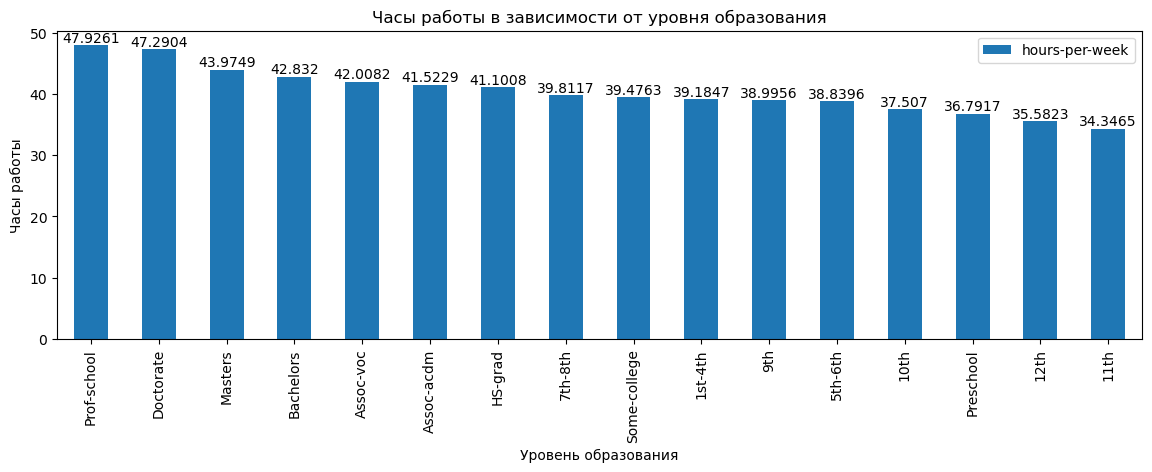

In [19]:
#связь уровня образования и количества часов работы в неделю
time = data[['hours-per-week', 'education']].groupby('education').mean().sort_values('hours-per-week', ascending=False)
ax = time.plot(kind='bar', title='Часы работы в зависимости от уровня образования',
                             xlabel='Уровень образования',
                             ylabel='Часы работы',
                    figsize=[14,4])
ax.bar_label(ax.containers[0])

Можно сделать вывод, что чем выше уровень образования - тем больше часов в неделю занятость. Возможно, это обусловено тем, что выпусники классов школ совмещают работу и учёбу на следующем уровне образования.

[Text(0, 0, '42.866'), Text(0, 0, '36.9329')]

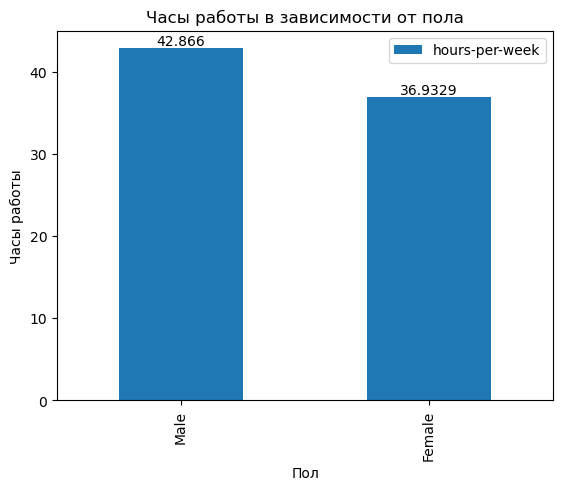

In [20]:
#кто работает больше, мужчины или женщины?
time = data[['hours-per-week', 'gender']].groupby('gender').mean().sort_values('hours-per-week', ascending=False)
ax = time.plot(kind='bar', title='Часы работы в зависимости от пола',
                             xlabel='Пол',
                             ylabel='Часы работы')
ax.bar_label(ax.containers[0])

Вывод: женщины работают меньше по часам, чем мужчины. Скорее всего, связано с необходимостью заниматься детьми.

#### Преобразуйте категориальные признаки.

###### рабочий класс

Неудача с OneHotEncoder_________________________________________________________________________________________________

In [21]:
from sklearn.preprocessing import OneHotEncoder

In [22]:
df_onehot = data.copy()

In [23]:
onehotencoder = OneHotEncoder(sparse_output = False)
 
encoded_df = pd.DataFrame(onehotencoder.fit_transform(data[['workclass']]))
encoded_df

,0,1,2,3,4,5,6
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
45217,0.0,0.0,1.0,0.0,0.0,0.0,0.0
45218,0.0,0.0,1.0,0.0,0.0,0.0,0.0
45219,0.0,0.0,1.0,0.0,0.0,0.0,0.0
45220,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [24]:
 onehotencoder.get_feature_names_out() #получаем названия столбцов

array(['workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov',
       'workclass_Without-pay'], dtype=object)

In [25]:
encoded_df.columns = onehotencoder.get_feature_names_out() #задаём названия столбцов
encoded_df

,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
45217,0.0,0.0,1.0,0.0,0.0,0.0,0.0
45218,0.0,0.0,1.0,0.0,0.0,0.0,0.0
45219,0.0,0.0,1.0,0.0,0.0,0.0,0.0
45220,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [26]:
df_onehot = df_onehot.join(encoded_df, how='left')

In [27]:
df_onehot

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,...,hours-per-week,native-country,income,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,...,40,United-States,<=50K,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,...,50,United-States,<=50K,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,...,40,United-States,>50K,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,...,40,United-States,>50K,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,...,30,United-States,<=50K,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,...,38,United-States,<=50K,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,...,40,United-States,>50K,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,...,40,United-States,<=50K,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,...,20,United-States,<=50K,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Конец неудачи__________________________________________________________________________________________________


Вопрос эксперту: Почему последняя часть таблицы со значениями nan? где я неправильно схлопываю таблицы? 

In [29]:
selectedColumns = data.copy()
X = pd.get_dummies(selectedColumns, columns=['workclass'])
print('Пометили рабочий класс.')
X

Пометили рабочий класс.


,age,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,...,hours-per-week,native-country,income,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay
0,25,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,...,40,United-States,<=50K,False,False,True,False,False,False,False
1,38,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,...,50,United-States,<=50K,False,False,True,False,False,False,False
2,28,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,...,40,United-States,>50K,False,True,False,False,False,False,False
3,44,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,...,40,United-States,>50K,False,False,True,False,False,False,False
5,34,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,...,30,United-States,<=50K,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,...,38,United-States,<=50K,False,False,True,False,False,False,False
48838,40,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,...,40,United-States,>50K,False,False,True,False,False,False,False
48839,58,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,...,40,United-States,<=50K,False,False,True,False,False,False,False
48840,22,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,...,20,United-States,<=50K,False,False,True,False,False,False,False


###### уровень образования

In [30]:
selectedColumns = X.copy()
X = pd.get_dummies(selectedColumns, columns=['education'])
print('Пометили образование.')
X

Пометили образование.


,age,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,...,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college
0,25,226802,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,...,False,False,False,False,False,False,False,False,False,False
1,38,89814,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,...,False,False,False,False,False,True,False,False,False,False
2,28,336951,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,...,False,True,False,False,False,False,False,False,False,False
3,44,160323,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,...,False,False,False,False,False,False,False,False,False,True
5,34,198693,6,Never-married,Other-service,Not-in-family,White,Male,0,0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,257302,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,...,False,True,False,False,False,False,False,False,False,False
48838,40,154374,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,...,False,False,False,False,False,True,False,False,False,False
48839,58,151910,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,...,False,False,False,False,False,True,False,False,False,False
48840,22,201490,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,...,False,False,False,False,False,True,False,False,False,False


###### marital-status

In [31]:
selectedColumns = X.copy()
X = pd.get_dummies(selectedColumns, columns=['marital-status'])
print('Пометили marital-status.')
X

Пометили marital-status.


,age,fnlwgt,educational-num,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,...,education_Preschool,education_Prof-school,education_Some-college,marital-status_Divorced,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed
0,25,226802,7,Machine-op-inspct,Own-child,Black,Male,0,0,40,...,False,False,False,False,False,False,False,True,False,False
1,38,89814,9,Farming-fishing,Husband,White,Male,0,0,50,...,False,False,False,False,False,True,False,False,False,False
2,28,336951,12,Protective-serv,Husband,White,Male,0,0,40,...,False,False,False,False,False,True,False,False,False,False
3,44,160323,10,Machine-op-inspct,Husband,Black,Male,7688,0,40,...,False,False,True,False,False,True,False,False,False,False
5,34,198693,6,Other-service,Not-in-family,White,Male,0,0,30,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,257302,12,Tech-support,Wife,White,Female,0,0,38,...,False,False,False,False,False,True,False,False,False,False
48838,40,154374,9,Machine-op-inspct,Husband,White,Male,0,0,40,...,False,False,False,False,False,True,False,False,False,False
48839,58,151910,9,Adm-clerical,Unmarried,White,Female,0,0,40,...,False,False,False,False,False,False,False,False,False,True
48840,22,201490,9,Adm-clerical,Own-child,White,Male,0,0,20,...,False,False,False,False,False,False,False,True,False,False


###### occupation

In [32]:
selectedColumns = X.copy()
X = pd.get_dummies(selectedColumns, columns=['occupation'])
print('Пометили occupation.')
X

Пометили occupation.


,age,fnlwgt,educational-num,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,...,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving
0,25,226802,7,Own-child,Black,Male,0,0,40,United-States,...,False,False,True,False,False,False,False,False,False,False
1,38,89814,9,Husband,White,Male,0,0,50,United-States,...,True,False,False,False,False,False,False,False,False,False
2,28,336951,12,Husband,White,Male,0,0,40,United-States,...,False,False,False,False,False,False,True,False,False,False
3,44,160323,10,Husband,Black,Male,7688,0,40,United-States,...,False,False,True,False,False,False,False,False,False,False
5,34,198693,6,Not-in-family,White,Male,0,0,30,United-States,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,257302,12,Wife,White,Female,0,0,38,United-States,...,False,False,False,False,False,False,False,False,True,False
48838,40,154374,9,Husband,White,Male,0,0,40,United-States,...,False,False,True,False,False,False,False,False,False,False
48839,58,151910,9,Unmarried,White,Female,0,0,40,United-States,...,False,False,False,False,False,False,False,False,False,False
48840,22,201490,9,Own-child,White,Male,0,0,20,United-States,...,False,False,False,False,False,False,False,False,False,False


###### relationship

In [33]:
selectedColumns = X.copy()
X = pd.get_dummies(selectedColumns, columns=['relationship'])
print('Пометили relationship.')
X

Пометили relationship.


,age,fnlwgt,educational-num,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,...,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife
0,25,226802,7,Black,Male,0,0,40,United-States,<=50K,...,False,False,False,False,False,False,False,True,False,False
1,38,89814,9,White,Male,0,0,50,United-States,<=50K,...,False,False,False,False,True,False,False,False,False,False
2,28,336951,12,White,Male,0,0,40,United-States,>50K,...,True,False,False,False,True,False,False,False,False,False
3,44,160323,10,Black,Male,7688,0,40,United-States,>50K,...,False,False,False,False,True,False,False,False,False,False
5,34,198693,6,White,Male,0,0,30,United-States,<=50K,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,257302,12,White,Female,0,0,38,United-States,<=50K,...,False,False,True,False,False,False,False,False,False,True
48838,40,154374,9,White,Male,0,0,40,United-States,>50K,...,False,False,False,False,True,False,False,False,False,False
48839,58,151910,9,White,Female,0,0,40,United-States,<=50K,...,False,False,False,False,False,False,False,False,True,False
48840,22,201490,9,White,Male,0,0,20,United-States,<=50K,...,False,False,False,False,False,False,False,True,False,False


###### race

In [34]:
selectedColumns = X.copy()
X = pd.get_dummies(selectedColumns, columns=['race'])
print('Пометили race.')
X

Пометили race.


,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,native-country,income,workclass_Federal-gov,...,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White
0,25,226802,7,Male,0,0,40,United-States,<=50K,False,...,False,False,True,False,False,False,False,True,False,False
1,38,89814,9,Male,0,0,50,United-States,<=50K,False,...,False,False,False,False,False,False,False,False,False,True
2,28,336951,12,Male,0,0,40,United-States,>50K,False,...,False,False,False,False,False,False,False,False,False,True
3,44,160323,10,Male,7688,0,40,United-States,>50K,False,...,False,False,False,False,False,False,False,True,False,False
5,34,198693,6,Male,0,0,30,United-States,<=50K,False,...,True,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,257302,12,Female,0,0,38,United-States,<=50K,False,...,False,False,False,False,True,False,False,False,False,True
48838,40,154374,9,Male,0,0,40,United-States,>50K,False,...,False,False,False,False,False,False,False,False,False,True
48839,58,151910,9,Female,0,0,40,United-States,<=50K,False,...,False,False,False,True,False,False,False,False,False,True
48840,22,201490,9,Male,0,0,20,United-States,<=50K,False,...,False,False,True,False,False,False,False,False,False,True


###### gender

In [35]:
labelencoder = LabelEncoder()
gn = labelencoder.fit_transform(X['gender'].values)
gn

array([1, 1, 1, ..., 0, 1, 0])

In [36]:
gender = pd.DataFrame()
gender['gender'] = X['gender']
gender['num'] = gn
gender.drop_duplicates(subset='num', keep='first', inplace=False)

,gender,num
0,Male,1
8,Female,0


In [37]:
X['gender'] = gn
X

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,native-country,income,workclass_Federal-gov,...,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White
0,25,226802,7,1,0,0,40,United-States,<=50K,False,...,False,False,True,False,False,False,False,True,False,False
1,38,89814,9,1,0,0,50,United-States,<=50K,False,...,False,False,False,False,False,False,False,False,False,True
2,28,336951,12,1,0,0,40,United-States,>50K,False,...,False,False,False,False,False,False,False,False,False,True
3,44,160323,10,1,7688,0,40,United-States,>50K,False,...,False,False,False,False,False,False,False,True,False,False
5,34,198693,6,1,0,0,30,United-States,<=50K,False,...,True,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,257302,12,0,0,0,38,United-States,<=50K,False,...,False,False,False,False,True,False,False,False,False,True
48838,40,154374,9,1,0,0,40,United-States,>50K,False,...,False,False,False,False,False,False,False,False,False,True
48839,58,151910,9,0,0,0,40,United-States,<=50K,False,...,False,False,False,True,False,False,False,False,False,True
48840,22,201490,9,1,0,0,20,United-States,<=50K,False,...,False,False,True,False,False,False,False,False,False,True


###### native-country

In [38]:
selectedColumns = X.copy()
X = pd.get_dummies(selectedColumns, columns=['native-country'])
print('Пометили native-country.')
X

Пометили native-country.


,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,workclass_Federal-gov,workclass_Local-gov,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,1,0,0,40,<=50K,False,False,...,False,False,False,False,False,False,False,True,False,False
1,38,89814,9,1,0,0,50,<=50K,False,False,...,False,False,False,False,False,False,False,True,False,False
2,28,336951,12,1,0,0,40,>50K,False,True,...,False,False,False,False,False,False,False,True,False,False
3,44,160323,10,1,7688,0,40,>50K,False,False,...,False,False,False,False,False,False,False,True,False,False
5,34,198693,6,1,0,0,30,<=50K,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,257302,12,0,0,0,38,<=50K,False,False,...,False,False,False,False,False,False,False,True,False,False
48838,40,154374,9,1,0,0,40,>50K,False,False,...,False,False,False,False,False,False,False,True,False,False
48839,58,151910,9,0,0,0,40,<=50K,False,False,...,False,False,False,False,False,False,False,True,False,False
48840,22,201490,9,1,0,0,20,<=50K,False,False,...,False,False,False,False,False,False,False,True,False,False


###### income

In [39]:
labelencoder = LabelEncoder()
inc  = labelencoder.fit_transform(data['income'].values)
inc

array([0, 0, 1, ..., 0, 0, 1])

In [40]:
income = pd.DataFrame()
income['income'] = data['income']
income['num'] = inc
income.drop_duplicates(subset='num', keep='first', inplace=False)

,income,num
0,<=50K,0
2,>50K,1


In [41]:
X['income'] = inc
X

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,workclass_Federal-gov,workclass_Local-gov,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,1,0,0,40,0,False,False,...,False,False,False,False,False,False,False,True,False,False
1,38,89814,9,1,0,0,50,0,False,False,...,False,False,False,False,False,False,False,True,False,False
2,28,336951,12,1,0,0,40,1,False,True,...,False,False,False,False,False,False,False,True,False,False
3,44,160323,10,1,7688,0,40,1,False,False,...,False,False,False,False,False,False,False,True,False,False
5,34,198693,6,1,0,0,30,0,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,257302,12,0,0,0,38,0,False,False,...,False,False,False,False,False,False,False,True,False,False
48838,40,154374,9,1,0,0,40,1,False,False,...,False,False,False,False,False,False,False,True,False,False
48839,58,151910,9,0,0,0,40,0,False,False,...,False,False,False,False,False,False,False,True,False,False
48840,22,201490,9,1,0,0,20,0,False,False,...,False,False,False,False,False,False,False,True,False,False


In [42]:
X.columns.values.tolist ()

['age',
 'fnlwgt',
 'educational-num',
 'gender',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'income',
 'workclass_Federal-gov',
 'workclass_Local-gov',
 'workclass_Private',
 'workclass_Self-emp-inc',
 'workclass_Self-emp-not-inc',
 'workclass_State-gov',
 'workclass_Without-pay',
 'education_10th',
 'education_11th',
 'education_12th',
 'education_1st-4th',
 'education_5th-6th',
 'education_7th-8th',
 'education_9th',
 'education_Assoc-acdm',
 'education_Assoc-voc',
 'education_Bachelors',
 'education_Doctorate',
 'education_HS-grad',
 'education_Masters',
 'education_Preschool',
 'education_Prof-school',
 'education_Some-college',
 'marital-status_Divorced',
 'marital-status_Married-AF-spouse',
 'marital-status_Married-civ-spouse',
 'marital-status_Married-spouse-absent',
 'marital-status_Never-married',
 'marital-status_Separated',
 'marital-status_Widowed',
 'occupation_Adm-clerical',
 'occupation_Armed-Forces',
 'occupation_Craft-repair',
 'occupation_Exec-managerial',

In [43]:
#Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.
X_new = X[['age',
 'fnlwgt',
 'educational-num',
 'gender',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'workclass_Federal-gov',
 'workclass_Local-gov',
 'workclass_Private',
 'workclass_Self-emp-inc',
 'workclass_Self-emp-not-inc',
 'workclass_State-gov',
 'workclass_Without-pay',
 'education_10th',
 'education_11th',
 'education_12th',
 'education_1st-4th',
 'education_5th-6th',
 'education_7th-8th',
 'education_9th',
 'education_Assoc-acdm',
 'education_Assoc-voc',
 'education_Bachelors',
 'education_Doctorate',
 'education_HS-grad',
 'education_Masters',
 'education_Preschool',
 'education_Prof-school',
 'education_Some-college',
 'marital-status_Divorced',
 'marital-status_Married-AF-spouse',
 'marital-status_Married-civ-spouse',
 'marital-status_Married-spouse-absent',
 'marital-status_Never-married',
 'marital-status_Separated',
 'marital-status_Widowed',
 'occupation_Adm-clerical',
 'occupation_Armed-Forces',
 'occupation_Craft-repair',
 'occupation_Exec-managerial',
 'occupation_Farming-fishing',
 'occupation_Handlers-cleaners',
 'occupation_Machine-op-inspct',
 'occupation_Other-service',
 'occupation_Priv-house-serv',
 'occupation_Prof-specialty',
 'occupation_Protective-serv',
 'occupation_Sales',
 'occupation_Tech-support',
 'occupation_Transport-moving',
 'relationship_Husband',
 'relationship_Not-in-family',
 'relationship_Other-relative',
 'relationship_Own-child',
 'relationship_Unmarried',
 'relationship_Wife',
 'race_Amer-Indian-Eskimo',
 'race_Asian-Pac-Islander',
 'race_Black',
 'race_Other',
 'race_White',
 'native-country_Cambodia',
 'native-country_Canada',
 'native-country_China',
 'native-country_Columbia',
 'native-country_Cuba',
 'native-country_Dominican-Republic',
 'native-country_Ecuador',
 'native-country_El-Salvador',
 'native-country_England',
 'native-country_France',
 'native-country_Germany',
 'native-country_Greece',
 'native-country_Guatemala',
 'native-country_Haiti',
 'native-country_Holand-Netherlands',
 'native-country_Honduras',
 'native-country_Hong',
 'native-country_Hungary',
 'native-country_India',
 'native-country_Iran',
 'native-country_Ireland',
 'native-country_Italy',
 'native-country_Jamaica',
 'native-country_Japan',
 'native-country_Laos',
 'native-country_Mexico',
 'native-country_Nicaragua',
 'native-country_Outlying-US(Guam-USVI-etc)',
 'native-country_Peru',
 'native-country_Philippines',
 'native-country_Poland',
 'native-country_Portugal',
 'native-country_Puerto-Rico',
 'native-country_Scotland',
 'native-country_South',
 'native-country_Taiwan',
 'native-country_Thailand',
 'native-country_Trinadad&Tobago',
 'native-country_United-States',
 'native-country_Vietnam',
 'native-country_Yugoslavia']]
y = X[['income']]

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Логистическая регрессия

In [45]:
X = X_new.copy()

In [46]:
#Обучите модель логистической регрессии 
model = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000)
)

In [47]:
model.fit(X_train, y_train)
predictions = model.predict(X_test)

C:\Users\Алехандро\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [48]:
#Для тестового множества предскажите уровень дохода и сравните с истинным значением, 
#посчитав точность предсказания моделей. Для этого используйте встроенную функцию score.
model.score(X_train, y_train) 

1.0

Получается точность 100%

#### SVM - метод опорных векторов

In [49]:
from sklearn.svm import SVC

# используем пайплайны
clf = make_pipeline(StandardScaler(), SVC()) 
clf.fit(X_train, y_train)

C:\Users\Алехандро\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

In [50]:
clf.score(X_train, y_train) 

0.9973463802968737

Точность SVM 99%

#### Ответ
Да, модели справились с поставленной задачей. У обоих моделей результат практически идеальный. Для улучшения результата можно попробовать:
1. Не удалять строки с пропущенными значениями, а попытаться их заменить какими-то значениями

В первой версии работы я заменяла значения всех категорий LabelEncoder, а не get_dummies. В том варианте решения точность была выше 80%.